## Assignment 5: Customer Lifetime Value Modeling 
###### By: Shimony Agrawal

In [1]:
%cd /Users/shimonyagrawal/Desktop
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/Users/shimonyagrawal/Desktop


## Part 1: Exploratory Data Analysis

#### Read the goldzoneplayers.csv into your environment. Then, clean up any NaNs that may be hiding out in the dataset -- remove them completely.

In [2]:
goldzone = pd.read_csv('goldzoneplayers.csv')

In [3]:
goldzone.head()

,PlayerID,Gender,MarStatus,Age,Education,Employment,Consecutive,TotalSpend,Unnamed: 8
0,1.0,M,S,24.0,HS,H,1.0,4430.0,NaN
1,2.0,M,S,27.0,C,S,3.0,6837.0,NaN
2,3.0,M,S,35.0,HS,S,3.0,5899.0,NaN
3,4.0,M,M,40.0,C,S,7.0,1524.0,NaN
4,5.0,M,S,19.0,HS,S,3.0,4474.0,NaN


In [4]:
goldzone = goldzone.drop('Unnamed: 8',1)
goldzone

,PlayerID,Gender,MarStatus,Age,Education,Employment,Consecutive,TotalSpend
0,1.0,M,S,24.0,HS,H,1.0,4430.0
1,2.0,M,S,27.0,C,S,3.0,6837.0
2,3.0,M,S,35.0,HS,S,3.0,5899.0
3,4.0,M,M,40.0,C,S,7.0,1524.0
4,5.0,M,S,19.0,HS,S,3.0,4474.0
...,...,...,...,...,...,...,...,...
191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
goldzone = goldzone.dropna()
goldzone

,PlayerID,Gender,MarStatus,Age,Education,Employment,Consecutive,TotalSpend
0,1.0,M,S,24.0,HS,H,1.0,4430.0
1,2.0,M,S,27.0,C,S,3.0,6837.0
2,3.0,M,S,35.0,HS,S,3.0,5899.0
3,4.0,M,M,40.0,C,S,7.0,1524.0
4,5.0,M,S,19.0,HS,S,3.0,4474.0
...,...,...,...,...,...,...,...,...
165,166.0,M,S,29.0,HS,H,3.0,6194.0
166,167.0,M,S,35.0,HS,U,6.0,5823.0
167,168.0,M,S,24.0,HS,S,5.0,3494.0
168,169.0,F,M,29.0,HS,U,5.0,4856.0


In [6]:
goldzone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 0 to 169
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PlayerID     169 non-null    float64
 1   Gender       169 non-null    object 
 2   MarStatus    169 non-null    object 
 3   Age          169 non-null    float64
 4   Education    169 non-null    object 
 5   Employment   169 non-null    object 
 6   Consecutive  169 non-null    float64
 7   TotalSpend   169 non-null    float64
dtypes: float64(4), object(4)
memory usage: 11.9+ KB


#### Generate up to 8 different visualizations for this dataset. For each visualization that you make, describe what it’s showing in 2-3 sentences.

#### Visualization 1: Total Spending with Regressor Line based on Age

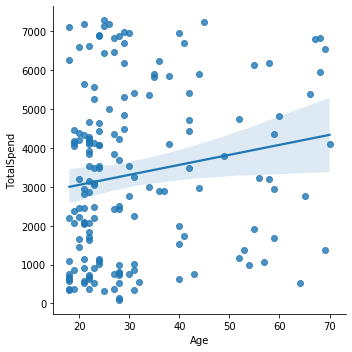

In [123]:
sns.lmplot(x='Age', y='TotalSpend', data=goldzone);

As seen from the above visualization, people over the age of 50 have a higher total spending as compared to younger age groups. This can be due to the fact the these people have a steady income and lifestyle as compared to their younger counterparts who are still settling down in their lives. 

#### Visualization 2: Total Spending based on Employment Status

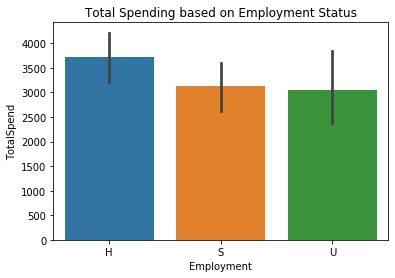

In [124]:
sns.barplot(x='Employment', y='TotalSpend', data=goldzone).set_title ('Total Spending based on Employment Status');

Here, we have three categories for employment hourly-wages employee, salaried employee and unemployed. As seen, hourly wages employees have a higher total spending than other two categories. However, the confidence interval shows variablility in the 3 categories which suggests maybe all data points are not included or the dataset is smaller. 

#### Visualization 3: Total Spending based on Gender and Marital Status

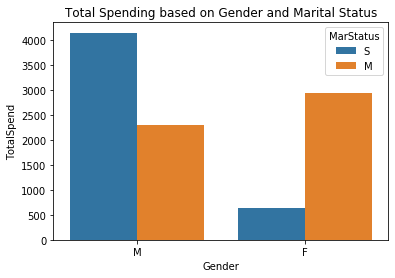

In [126]:
sns.barplot(x='Gender', y='TotalSpend', hue='MarStatus', ci = None, data=goldzone).set_title ('Total Spending based on Gender and Marital Status');

Here, I tried visualising 2 variables: gender and marital status. It can be inferred that single females have the lowest total spending followed by married males. There is a striking difference in the spending power of males when it comes to marital status. Single Males have higher total spending than married males. There is a similar pattern in the case of females however, here married females have higher total spending than single females. This can be based on the stereotype - that men have to support the household and take care of the family after getting married. So, men tend to spend less post marriage.

#### Visualization 4: Total Spending based on Education

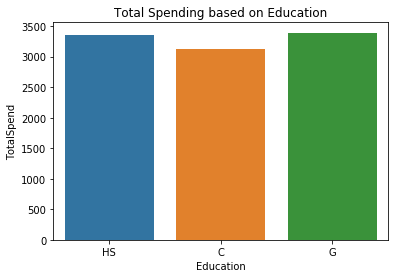

In [128]:
sns.barplot(x='Education', y='TotalSpend', ci = None, data=goldzone).set_title ('Total Spending based on Education');

We have 3 categories in Education: High School, College and Grad School. The three categories have similar total spending. This can be due to the fact that maybe education doesn't play a significant role in total spending as compared to other variables. 

#### Visualization 5: Category plot showing Total Spending across Gender, Marital Status and Employment

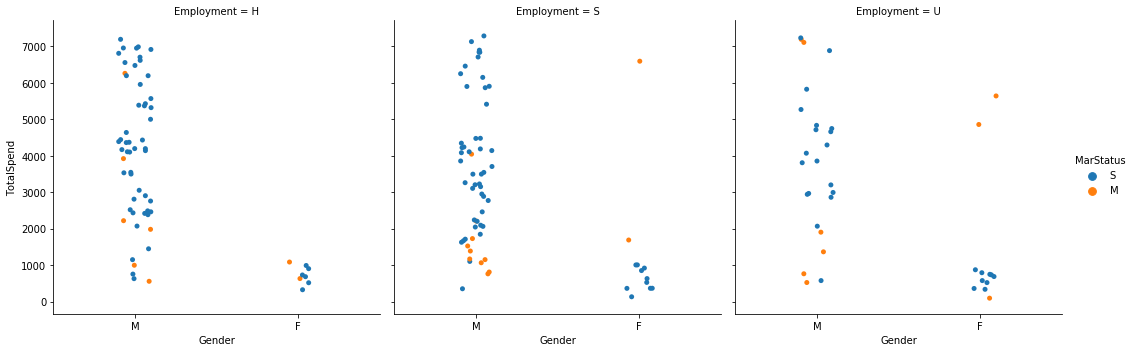

In [129]:
sns.catplot(x='Gender', y='TotalSpend', hue='MarStatus', col="Employment", data=goldzone);

Using the category plot, I compared gender with employment and marital status to find its impact on Total Spending. It is interesting to note that single, males with hourly wages and salaried employees have an overall higher total spending than females. Females across all types of employment have a very low total spending. This can be due to lower pay as compared to males. Another interesting observation is unemployed, married females have a quite high total spending. 

#### Visualizatin 6: Distribution Plot showing Total Spending Range

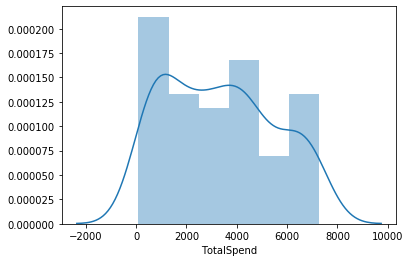

In [130]:
sns.distplot(goldzone['TotalSpend']);

#### Visualisation 7: Boxplot depicting Total Spending based on Gender 

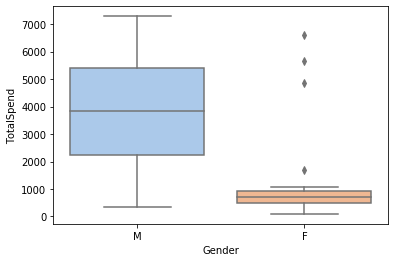

In [131]:
sns.boxplot(x= "Gender", y="TotalSpend", data=goldzone, palette = "pastel")

From the above boxplot, it can be inferred that males have a higher total spending as compared to females. However, this inconsistency and huge gap between males and females can be due to inconsistencies with data like not including females in the data or missing values. 

#### Visualization 8: Total spending based on the consecutive members at Lobsterland

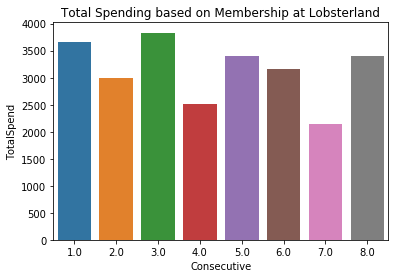

In [132]:
sns.barplot(x='Consecutive', y='TotalSpend', ci = None, data=goldzone).set_title ('Total Spending based on Membership at Lobsterland');

The barplot shows the total spending based on number of years a person was a member at Lobsterland. People in the 1st and 3rd year of membership have spent more as compared to 2nd, 4th and 7th years. 

TypeError: bar() got multiple values for keyword argument 'x'

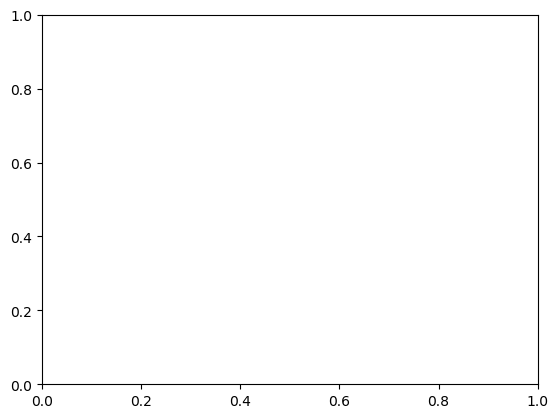

In [12]:
plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(x = goldzone['Employment'], y = goldzone['TotalSpend'], align='center', width = 0.5)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

#### Pass any two categories to the groupby() function in pandas, and then use describe() to learn about how TotalSpend varies among the groups formed by combining the levels for these categories. 

In [133]:
goldzone.groupby('Employment').describe()['TotalSpend']

,count,mean,std,min,25%,50%,75%,max
Employment,,,,,,,,
H,63.0,3725.507937,2126.465862,324.0,2144.0,4100.0,5405.5,7192.0
S,69.0,3133.492754,2081.576987,131.0,1386.0,2949.0,4239.0,7285.0
U,37.0,3049.405405,2288.191662,93.0,747.0,2965.0,4745.0,7231.0


From the above table it can be inferred that hourly-wage employees have a higher average spending as compared to others. 

In [136]:
goldzone.groupby('MarStatus').describe()['TotalSpend']

,count,mean,std,min,25%,50%,75%,max
MarStatus,,,,,,,,
M,29.0,2455.241379,2197.327966,93.0,996.00,1524.0,3920.0,7191.0
S,140.0,3518.171429,2106.139603,131.0,1812.25,3514.0,5066.0,7285.0


From the above table it can be inferred that singles are spending on an average $1,000 more than married people.

As seen from EDA, married people spend the lowest due to their other commitments like financial pressure, loan, paying off the mortage and bills etc. However, customers who are male, single and above the age of 50 can be good target customers for Lobsterland. 

## Part 2: Linear Regression Model 

#### Create a linear regression model that aims to predict the amount of money that a person will spend at the GoldZone in one summer (even though the ‘LV’ in ‘CLV’ stands for ‘Lifetime Value’, it is often calculated over a shorter period). Use all the variables in the dataset, but be sure to drop one level from any categorical input variables. Before you create the model, create a data partition that sends ⅓ of your data to ‘test’ and ⅔ to ‘train’. Use LinearRegression from scikit-learn.

In [137]:
goldzone_dummies = pd.get_dummies(goldzone, drop_first = True, 
                                  columns = ['Gender', 'MarStatus', 'Education', 'Employment'])
goldzone_dummies.columns

Index(['PlayerID', 'Age', 'Consecutive', 'TotalSpend', 'Gender_M',
       'MarStatus_S', 'Education_G', 'Education_HS', 'Employment_S',
       'Employment_U'],
      dtype='object')

In [138]:
X = goldzone_dummies[[ 'Age', 'Consecutive', 'Gender_M',
       'MarStatus_S', 'Education_G', 'Education_HS', 'Employment_S',
       'Employment_U']]
y = goldzone_dummies['TotalSpend']

In [139]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.333, random_state = 30)

In [140]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from sklearn import metrics


lm_goldzone = LinearRegression()
lm_goldzone.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [141]:
lm_goldzone.intercept_

571.5246045536364

In [142]:
coefficient_goldzone = pd.DataFrame(lm_goldzone.coef_, X_train.columns, columns = ['Coefficient'])
coefficient_goldzone

,Coefficient
Age,16.776163
Consecutive,-71.562938
Gender_M,2453.719292
MarStatus_S,1156.200540
Education_G,-729.478319
Education_HS,-275.306446
Employment_S,-529.798547
Employment_U,114.448044


#### Write a paragraph that explains the meaning of each of your model’s coefficients. 

As seen from the table, Total Spending is the highest for Males. From the Exploratory Data Analysis also we found similar inferences. Additionally, singles are also having a high Total Spending. Variables like education and hourly-wage and salaried employees do not have a positive impact on Total Spending. However, unemployed customers do have a significant impact on Total Spending.

In terms of impact on Total Spending, age, gender_males and singles have the maximum impact. Lobsterland can use them as a target audience and increase its memberships. 

#### Generate the following statistics for your linear regression model: RMSE, r-squared, median absolute error. Generate these stats for your model’s performance against both train and test (but remember, you will only build the model with train).

In [69]:
pred_train = lm_goldzone.predict(X_train)
# pred_train

In [67]:
pred_test = lm_goldzone.predict(X_test)
# pred_test 

In [72]:
medianerror_train = metrics.median_absolute_error(y_train, pred_train)
print(medianerror_train)
meansqerror_train = metrics.mean_squared_error(y_train, pred_train)
print(meansqerror_train)
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, pred_train))
print(rmse_train)
rsquared_train = r2_score(y_train, pred_train)
print(rsquared_train)

1160.2445359153648
3122264.8579274016
1766.9931686136767
0.2904248126206438


In [73]:
medianerror_test = metrics.median_absolute_error(y_test, pred_test)
print(medianerror_test)
meansqerror_test = metrics.mean_squared_error(y_test, pred_test)
print(meansqerror_test)
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, pred_test))
print(rmse_test)
rsquared_test = r2_score(y_test, pred_test)
print(rsquared_test)

1249.2651609154655
3791974.7466529426
1947.299346955404
0.24361190106347097


## Part 3: Decision Tree Regressor Model 

#### Using the DecisionTreeRegressor module from scikit-learn, build a regression tree model for this dataset. Use the same inputs that you used in the previous model, in the same format, but with one difference this time -- pass all levels of all your input variables to the model this time -- in a tree, there’s no need to drop a level.

In [144]:
goldzone_dummiestree = pd.get_dummies(goldzone, columns = ['Gender', 'MarStatus' , 'Education', 'Employment'])
goldzone_dummiestree.columns

Index(['PlayerID', 'Age', 'Consecutive', 'TotalSpend', 'Gender_F', 'Gender_M',
       'MarStatus_M', 'MarStatus_S', 'Education_C', 'Education_G',
       'Education_HS', 'Employment_H', 'Employment_S', 'Employment_U'],
      dtype='object')

In [152]:
X1 = goldzone_dummiestree[['PlayerID', 'Age', 'Consecutive','Gender_F', 'Gender_M',
       'MarStatus_M', 'MarStatus_S', 'Education_C', 'Education_G',
       'Education_HS', 'Employment_H', 'Employment_S', 'Employment_U']]
y1 = goldzone_dummiestree['TotalSpend']

In [153]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.333, random_state = 30)

In [154]:
from sklearn.tree import DecisionTreeRegressor

goldzone_regressor =  DecisionTreeRegressor(random_state = 30)
goldzone_regressor = goldzone_regressor.fit(X1_train, y1_train)

In [155]:
pred_testtree = goldzone_regressor.predict(X1_test)
pred_testtree

array([4100., 6707., 2884., 3807., 4194., 2067.,  575., 6707.,  682.,
        989.,  575., 2992., 6894., 3531., 2433., 4637., 2093., 6950.,
       6148., 3542., 6194., 3260., 4637., 1084., 1168., 4387.,  732.,
       2062.,  762., 2433., 7285., 6555., 6808., 6195., 1903., 6615.,
       6894., 5639., 2884.,  918., 3203., 7285., 2418., 2418.,  575.,
        791.,  630., 1711.,  989., 4294.,  989.,  575., 3151.,  732.,
       7191., 7107., 6148.])

In [156]:
pred_traintree = goldzone_regressor.predict(X1_train)
pred_traintree

array([4441.,  850., 1846.,  762.,  336.,  918., 5899., 6702., 6954.,
        522.,  989., 3260.,  732.,  575.,  791., 6808., 2093., 4658.,
       6841., 7285.,  810., 1711., 3531., 4100., 6615., 2218., 2418.,
       2461., 6882., 4999., 3854., 6194., 7107.,  630., 2062., 2433.,
       5385.,  362., 1903., 4478., 3494., 3542., 6707.,  575., 7192.,
       5904.,  753., 3104., 4474., 6950., 2884., 1981., 2941., 1005.,
       2067., 3203., 3807., 6195., 4745., 4387., 4194., 2771., 4712.,
       2044., 6148., 4294., 4637., 3497., 4141., 1364., 4043., 5639.,
       4856., 2238., 4360.,  729., 4186., 2518.,  996., 3495., 1727.,
       3151., 3199., 4195., 3052., 1168., 1150., 5267.,  760., 4069.,
       3225.,  628., 1149., 6894.,  682.,  365., 5567., 4139., 1084.,
       7191., 1688., 2460., 2992., 2382.,  630., 3920., 2487.,  872.,
        324., 6555., 5823., 1064.])

#### Create a visualization of your regression tree model. Write a paragraph that describes any four rules generated by your tree. (A rule is formed by tracing the path of a record from the top of the tree to the bottom).

#### Generate the following statistics for your tree model: RMSE, r-squared, median absolute error.

In [158]:
medianerror_traintree = metrics.median_absolute_error(y1_train, pred_traintree)
print(medianerror_traintree)
meansqerror_traintree = metrics.mean_squared_error(y1_train, pred_traintree)
print(meansqerror_traintree)
rmse_traintree = np.sqrt(metrics.mean_squared_error(y1_train, pred_traintree))
print(rmse_traintree)
rsquared_traintree = r2_score(y1_train, pred_traintree)
print(rsquared_traintree)

0.0
0.0
0.0
1.0


In [161]:
medianerror_testtree = metrics.median_absolute_error(y1_test, pred_testtree)
print(medianerror_testtree)
meansqerror_testtree = metrics.mean_squared_error(y1_test, pred_testtree)
print(meansqerror_testtree)
rmse_testtree = np.sqrt(metrics.mean_squared_error(y1_test, pred_testtree))
print(rmse_testtree)
rsquared_testtree = r2_score(y1_test, pred_testtree)
print(rsquared_testtree)

853.0
3676235.5263157897
1917.351174489376
0.2666984917430337


As we can see, the training data is overfitted. In the training data set the median absolute error, mean squared error and the rmse are 0. The R-Squared is 1 which shows the model is predicting perfectly. When comparing it with the test data, the median absolute error, mean sqaured error and rmse are very high. To overcome overfitting, I have used the max depth parameter to limit the tree growth.

#### Generate these stats for your model’s performance against both train and test (but remember, you will only build the model with train). If you find that your model has been heavily overfit to your training set, consider using the maxdepth parameter (or any other adjustment) to limit tree growth).

In [162]:
goldzone_regressor.get_depth()

18

In [163]:
goldzone_regressor =  DecisionTreeRegressor(random_state = 30, max_depth = 5)
goldzone_regressor = goldzone_regressor.fit(X_train, y_train)

In [164]:
goldzone_regressor.get_depth()

5

## Model Comparison

### Use a histogram to visualize the distribution of the difference between linear regression model predictions against the test set and actual y_test values. Then, do the same thing for the difference between the regression tree model predictions against the test set and the actual y_test values.

In [171]:
lr_d = {'Linear Regression Actual': y_test, 'Linear Regression Predicted': pred_test}
df_lr = pd.DataFrame(data = lr_d)

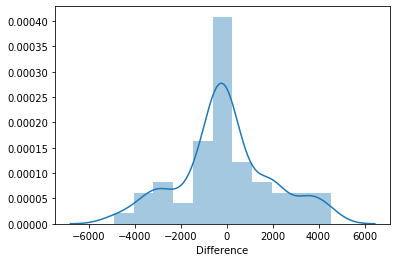

In [172]:
df_lr['Difference'] = df_lr['Linear Regression Actual'] - df_lr['Linear Regression Predicted']
sns.distplot(df_lr['Difference'])

In [174]:
dr_d = {'Decision Tree Regressor Actual': y1_test, 'Decision Tree Regressor Predicted': pred_testtree}
df_dr = pd.DataFrame(data = dr_d)

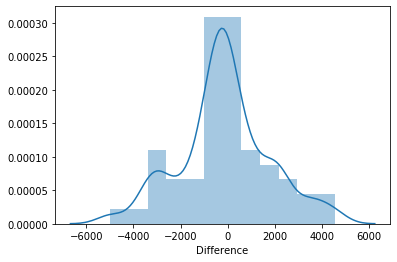

In [175]:
df_dr['Difference'] = df_dr['Decision Tree Regressor Actual'] - df_dr['Decision Tree Regressor Predicted']
sns.distplot(df_dr['Difference'])

#### How are these plots different? What does this suggest? How did the model statistics (r-squared, RMSE, MAE) differ as you switched from linear regression to the regression tree?

Comparing the two models, the RMSE decresed in the Decsion Tree Regressor Model as we switched from Linear Model. However, the R-Squared value remains approximately similar. 


#### Why might Lobster Land care about a model like this? What could it do with a model that could effectively make such a prediction?

Models like these can help in making marketing, financial and operational decsions. These models can help Lobsterland know about their target customers, forecasted sales, profit and overall functioning of the park. Using them, they can use A/B testing to find which strategy works the best for them and can constantly improvise.

#### Write a thoughtful paragraph that speculates about the relative performance of linear regression vs. a tree model for this particular dataset. To answer this, you don’t need any particularly sophisticated knowledge of either type of model type -- all you need to is take a close look at what you have seen and found in the steps above. Think about what the linear regression coefficients indicate, and then consider what your tree model shows you, as well as what you learned during the EDA phase. Now wait, one last thing -- stop and think for a moment about the model type whose performance was worse in this assignment -- could you ever think of a scenario where it might be better than the other one?

Upon analysing the performance of the models I think that the linear Regression model didn't perform well. Based on the statistics we generated, it can be seen that the Decision Tree Regressor model fitted better, had a lower median absolute error, mean squared error and rmse. This can be due to the variables in this dataset being categorical. Linear Regression doesn't work well with categorical varialbes but decision tree does. According to the coefficients, age had the highest impact followed by gender and marital status. Based on the EDA, I identified the target audience for Lobsterland - single males over the age of 50. I found many more intersting observations like for instance, females have an overall lower Total Spending as compared to men; hourly-wage employees have higher average spending than others etc. 

Linear Regression didn't work for our dataset since it doesn't work well with categorical variables.Linear Regression is used to predict continuous outputs where there is a linear relationship between the features of the dataset and the output variable. Decision trees work by splitting the dataset, in a tree-like structure, into smaller and smaller subsets and then make predictions based on what subset a new example would fall into.